# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.holtwinters import SimpleExpSmoothing #Single Exponential Smoothing
from statsmodels.tsa.holtwinters import Holt #Holt (Double) Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing #Holt Winter's (Triple) Exponential Smoothing
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from sklearn.metrics import mean_squared_error
import warnings
import itertools

In [ ]:
df = pd.read_excel('/content/Airlines+Data.xlsx',
                    index_col = 0,
                    header = 0,
                    parse_dates = True)

In [ ]:
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


# **Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [ ]:
df.isnull().sum()

Passengers    0
dtype: int64

In [ ]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [ ]:
df.shape

(96, 1)

In [ ]:
df.columns

Index(['Passengers'], dtype='object')

In [ ]:
df.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

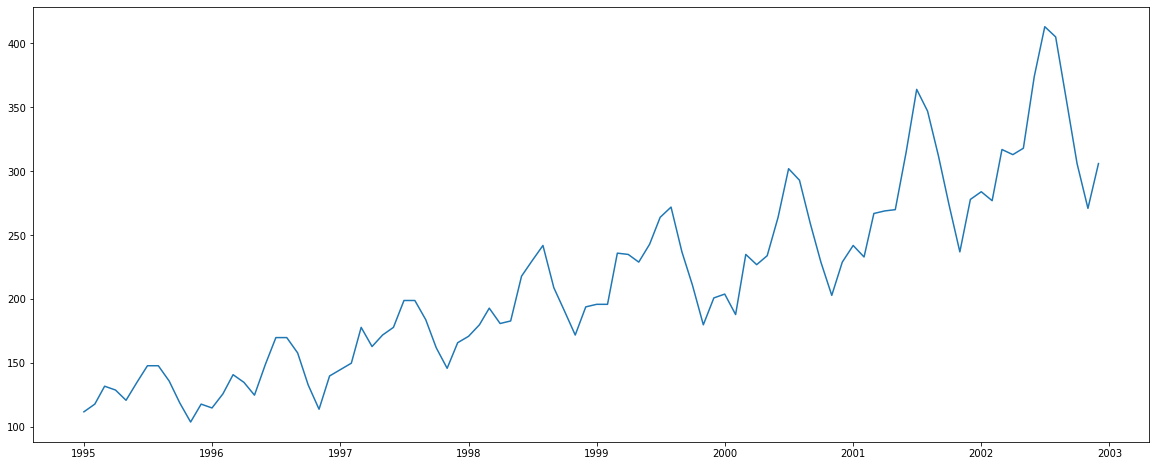

In [ ]:
plt.figure(figsize = (20,8))
plt.plot(df)

# **Histogram and Density Plots**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b89fc53a0>]],
      dtype=object)

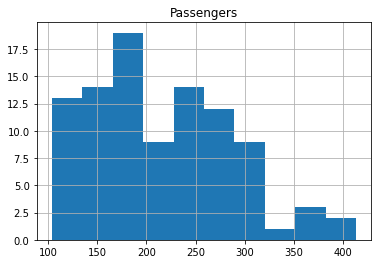

In [ ]:
df.hist()

# **Density Plot**

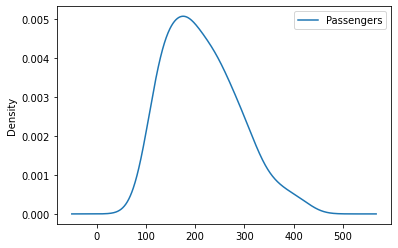

In [ ]:
df.plot(kind = 'kde')

# **Box and Whisker Plots by Interval**

In [ ]:
type(pd.read_excel('/content/Airlines+Data.xlsx',
                    index_col = 0,
                    header = 0,
                    parse_dates = True,
                    squeeze = True))

pandas.core.series.Series

In [ ]:
df = pd.read_excel('/content/Airlines+Data.xlsx',
                    index_col = 0,
                    header = 0,
                    parse_dates = True,
                    squeeze = True)
df

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [ ]:
type(df)

pandas.core.series.Series

In [ ]:
groups = df.groupby(pd.Grouper(freq='A')) # A = year end frequency
groups

In [ ]:
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years

,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


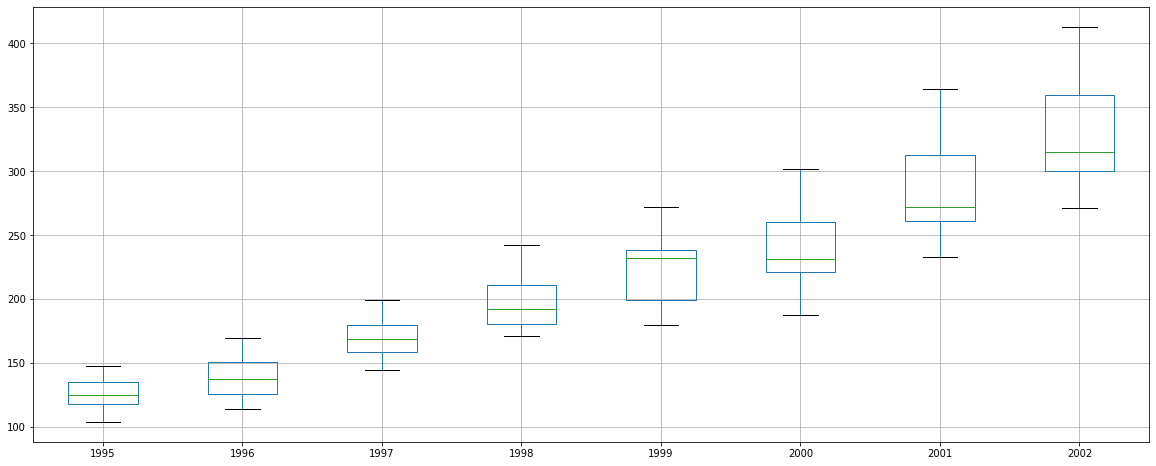

In [ ]:
plt.figure(figsize = (20,8))
years.boxplot()

# **Lag Plot**

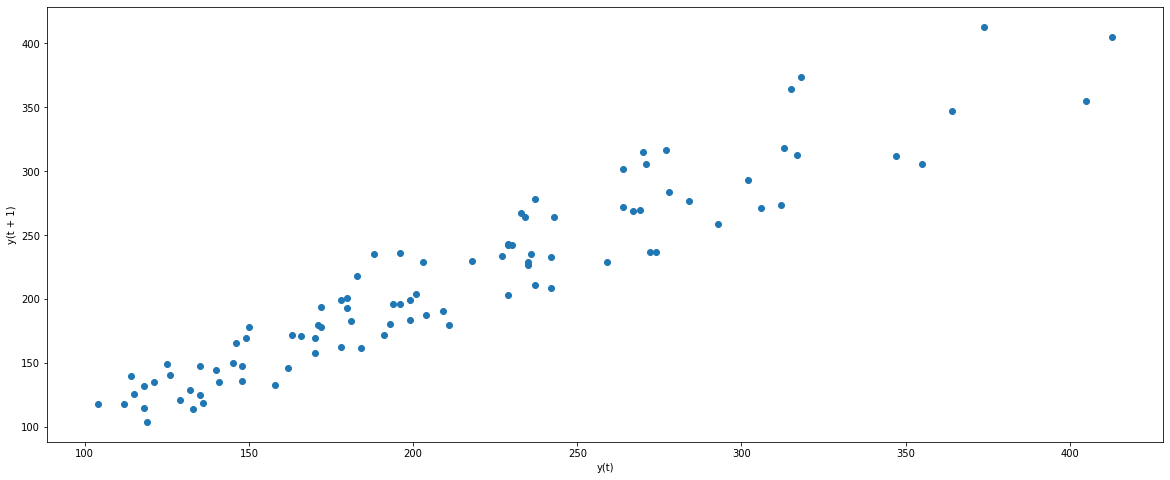

In [ ]:
plt.figure(figsize = (20,8))
pd.plotting.lag_plot(df)

# **Autocorrelation Plot**

<Figure size 1440x1080 with 0 Axes>

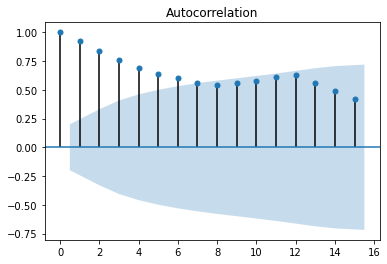

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (20,15))
plot_acf(df, lags=15) 
plt.show()

# **Upsampling Data**

In [ ]:
df.shape

(96,)

In [ ]:
upsampled = df.resample('D').mean() # D = Days
upsampled.head(32)

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
1995-01-11      NaN
1995-01-12      NaN
1995-01-13      NaN
1995-01-14      NaN
1995-01-15      NaN
1995-01-16      NaN
1995-01-17      NaN
1995-01-18      NaN
1995-01-19      NaN
1995-01-20      NaN
1995-01-21      NaN
1995-01-22      NaN
1995-01-23      NaN
1995-01-24      NaN
1995-01-25      NaN
1995-01-26      NaN
1995-01-27      NaN
1995-01-28      NaN
1995-01-29      NaN
1995-01-30      NaN
1995-01-31      NaN
1995-02-01    118.0
Freq: D, Name: Passengers, dtype: float64

In [ ]:
upsampled.shape

(2892,)

# **Interpolate the missing value**

In [ ]:
interpolated = upsampled.interpolate(method = 'linear')
interpolated.head(32)

Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
1995-01-06    112.967742
1995-01-07    113.161290
1995-01-08    113.354839
1995-01-09    113.548387
1995-01-10    113.741935
1995-01-11    113.935484
1995-01-12    114.129032
1995-01-13    114.322581
1995-01-14    114.516129
1995-01-15    114.709677
1995-01-16    114.903226
1995-01-17    115.096774
1995-01-18    115.290323
1995-01-19    115.483871
1995-01-20    115.677419
1995-01-21    115.870968
1995-01-22    116.064516
1995-01-23    116.258065
1995-01-24    116.451613
1995-01-25    116.645161
1995-01-26    116.838710
1995-01-27    117.032258
1995-01-28    117.225806
1995-01-29    117.419355
1995-01-30    117.612903
1995-01-31    117.806452
1995-02-01    118.000000
Freq: D, Name: Passengers, dtype: float64

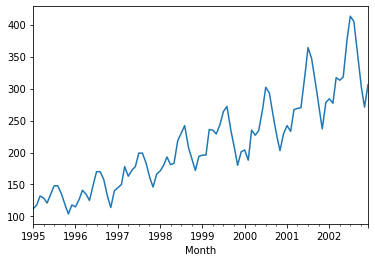

In [ ]:
interpolated.plot()

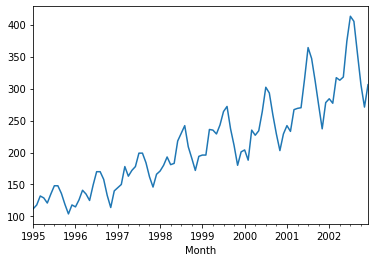

In [ ]:
df.plot()

# **Downsampling Data**

In [ ]:
# downsample to quartely intervals
resample = df.resample('Q') # Q = Quartely
# Downsampling means we have to reduce the size of data
quarterly_means_sales = resample.mean()

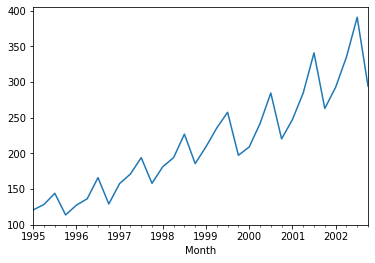

In [ ]:
quarterly_means_sales.plot()

# **Transformations**

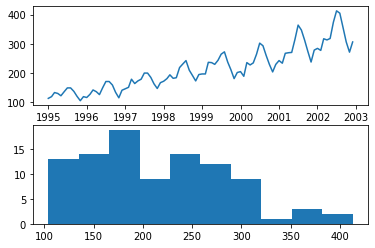

In [ ]:
#Line Plot
plt.subplot(211)
plt.plot(df)

#Histogram
plt.subplot(212)
plt.hist(df)

plt.show()

# **Square Root Transform**

In [ ]:
dataframe = pd.DataFrame(np.sqrt(df.values), columns = ['passengers'])
dataframe

,passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000
...,...
91,20.124612
92,18.841444
93,17.492856
94,16.462078


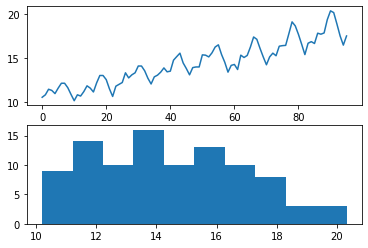

In [ ]:
# Line Plot
plt.subplot(211)
plt.plot(dataframe['passengers'])

# Line Plot
plt.subplot(212)
plt.hist(dataframe['passengers'])

plt.show()

# **Log Transform**

In [ ]:
dataframe = pd.DataFrame(np.log(df.values), columns = ['passengers'])
dataframe

,passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
91,6.003887
92,5.872118
93,5.723585
94,5.602119


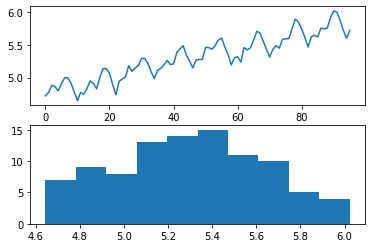

In [ ]:
# Line Plot
plt.subplot(211)
plt.plot(dataframe['passengers'])

# Line Plot
plt.subplot(212)
plt.hist(dataframe['passengers'])

plt.show()

In [ ]:
quarterly_means_sales.head()

Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
Freq: Q-DEC, Name: Passengers, dtype: float64

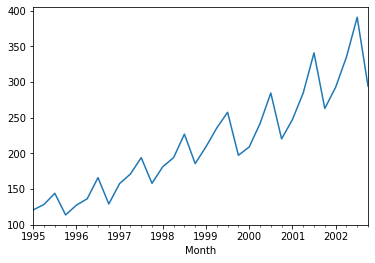

In [ ]:
quarterly_means_sales.plot()

In [ ]:
df = pd.read_excel('/content/Airlines+Data.xlsx')

In [ ]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [ ]:
df.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [ ]:
df.shape

(96, 2)

In [ ]:
df['t'] = np.arange(1,97)

In [ ]:
df['t_squared'] = df['t']**2

In [ ]:
df['Passengers_log'] = np.log(df['Passengers'])

In [ ]:
df

,Month,Passengers,t,t_squared,Passengers_log
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791
...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887
92,2002-09-01,355,93,8649,5.872118
93,2002-10-01,306,94,8836,5.723585
94,2002-11-01,271,95,9025,5.602119


# **Splitting Data**

In [ ]:
Train = df.head(76)
Test = df.tail(20)

In [ ]:
Train

,Month,Passengers,t,t_squared,Passengers_log
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791
...,...,...,...,...,...
71,2000-12-01,229,72,5184,5.433722
72,2001-01-01,242,73,5329,5.488938
73,2001-02-01,233,74,5476,5.451038
74,2001-03-01,267,75,5625,5.587249


In [ ]:
Test

,Month,Passengers,t,t_squared,Passengers_log
76,2001-05-01,270,77,5929,5.598422
77,2001-06-01,315,78,6084,5.752573
78,2001-07-01,364,79,6241,5.897154
79,2001-08-01,347,80,6400,5.849325
80,2001-09-01,312,81,6561,5.743003
81,2001-10-01,274,82,6724,5.613128
82,2001-11-01,237,83,6889,5.468060
83,2001-12-01,278,84,7056,5.627621
84,2002-01-01,284,85,7225,5.648974
85,2002-02-01,277,86,7396,5.624018


# **Moving Average**

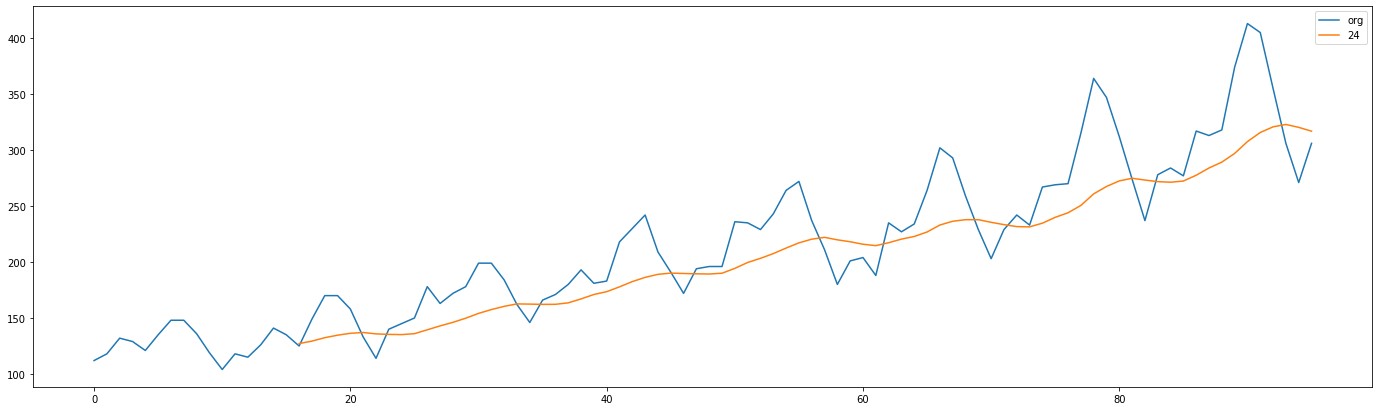

In [ ]:
plt.figure(figsize = (24,7))
df['Passengers'].plot(label = "org")
df['Passengers'].rolling(17).mean().plot(label = str(24)) # rolling(17) = means taking 17 monthly moving average
plt.legend(loc='best')

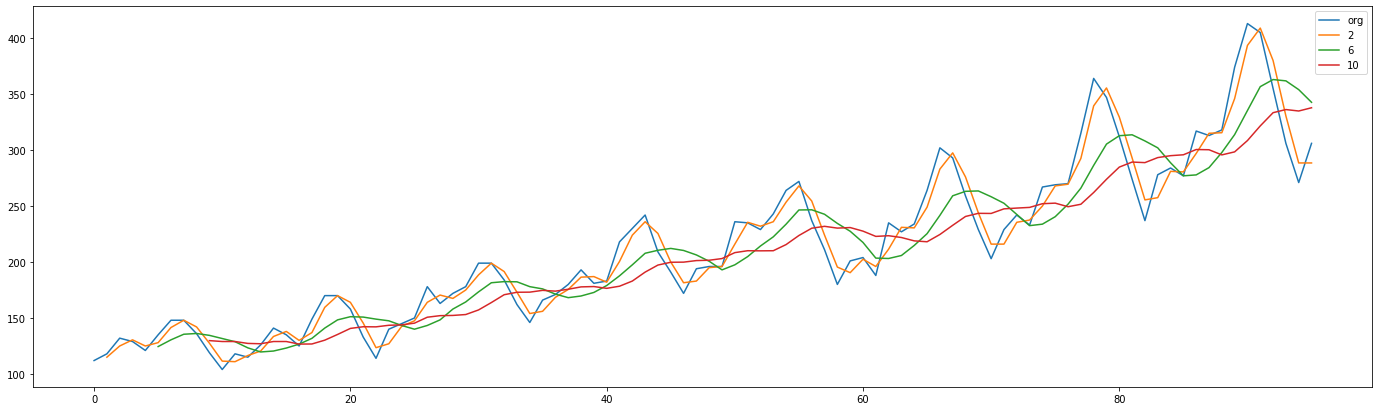

In [ ]:
plt.figure(figsize = (24,7))
df['Passengers'].plot(label = "org")
for i in range(2,12,4): #Starting from 2 with the gap of 4 and go till 12
    df['Passengers'].rolling(i).mean().plot(label = str(i))
plt.legend(loc='best')

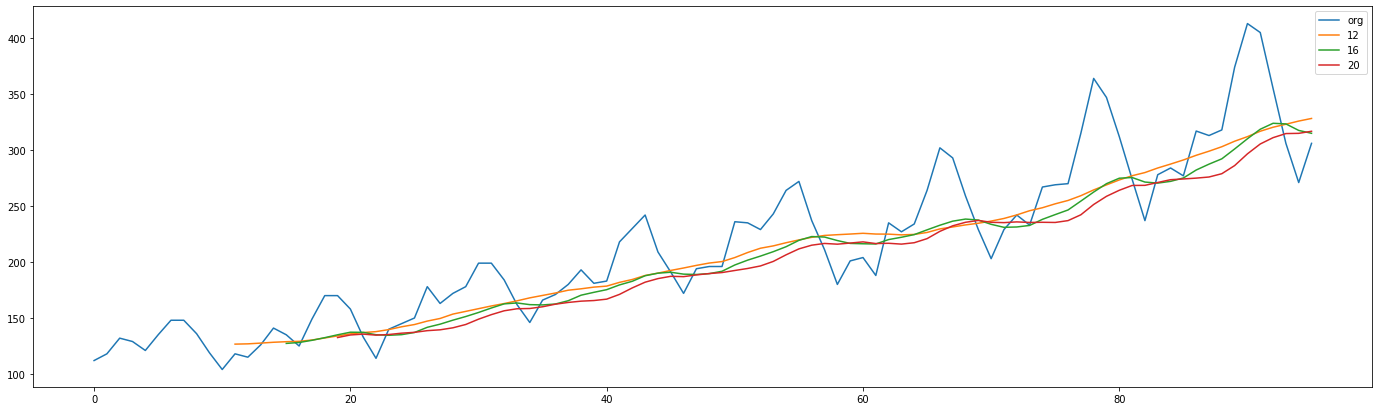

In [ ]:
plt.figure(figsize = (24,7))
df['Passengers'].plot(label = "org")
for i in range(12,24,4): #Starting from 2 with the gap of 4 and go till 12
    df['Passengers'].rolling(i).mean().plot(label = str(i))
plt.legend(loc='best')

# **Time series decomposition plot**

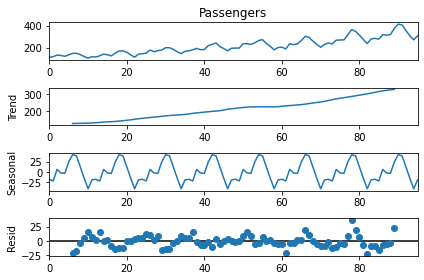

In [ ]:
decompose_ts_add = seasonal_decompose(df['Passengers'],period=12)
decompose_ts_add.plot()
plt.show()

# **ACF plots and PACF plots**

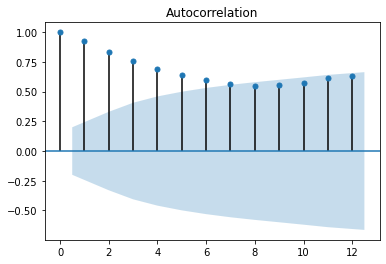

In [ ]:
tsa_plots.plot_acf(df['Passengers'], lags=12)
plt.show()

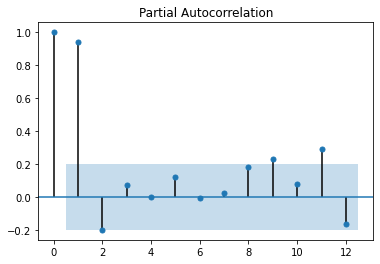

In [ ]:
tsa_plots.plot_pacf(df['Passengers'], lags=12)
plt.show()

# **Evaluation Metric MAPE**

In [ ]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# **Simple Exponential Method**

In [ ]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.9)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


14.866213671680418

# **Holt Method**

In [ ]:
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

12.962869135425715

# **Holts winter exponential smoothing with additive seasonality and additive trend**

In [ ]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

8.724275418028359

# **Holts winter exponential smoothing with multiplicative seasonality and additive trend**

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

9.375491652603333

# **Final Model by combining train and test**

In [ ]:
hwe_model_add_add = ExponentialSmoothing(df.Passengers,seasonal="add",trend="add",seasonal_periods=12).fit()

In [ ]:
hwe_model_add_add.forecast(10)

96     319.234886
97     311.527891
98     350.278075
99     346.984195
100    351.844121
101    403.924848
102    440.565979
103    427.445771
104    376.627413
105    329.766583
dtype: float64

# **Forecasting Model Based Method**

In [ ]:
df.head()

,Month,Passengers,t,t_squared,Passengers_log
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791


In [ ]:
#Extracting Day, Weekday name, month name, year from the Date column using Date functions from pandas

df['month'] = df['Month'].dt.strftime("%b") # month extracton
df['year'] = df['Month'].dt.strftime("%Y") # year extracton

In [ ]:
df

,Month,Passengers,t,t_squared,Passengers_log,month,year
0,1995-01-01,112,1,1,4.718499,Jan,1995
1,1995-02-01,118,2,4,4.770685,Feb,1995
2,1995-03-01,132,3,9,4.882802,Mar,1995
3,1995-04-01,129,4,16,4.859812,Apr,1995
4,1995-05-01,121,5,25,4.795791,May,1995
...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,Aug,2002
92,2002-09-01,355,93,8649,5.872118,Sep,2002
93,2002-10-01,306,94,8836,5.723585,Oct,2002
94,2002-11-01,271,95,9025,5.602119,Nov,2002


In [ ]:
heatmap_y_month = pd.pivot_table(data=df,
                                values = 'Passengers',
                                index = 'year',
                                columns = 'month',
                                aggfunc = 'mean',
                                fill_value = 0)
heatmap_y_month

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


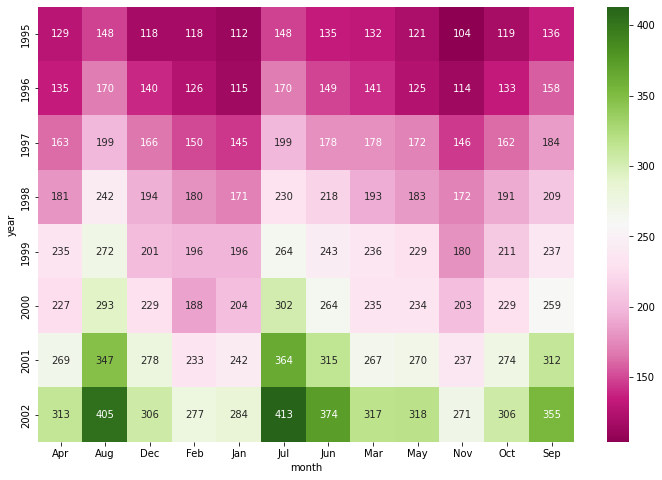

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_y_month,
           annot =  True,
           fmt = "g",
           cmap = 'PiYG') 

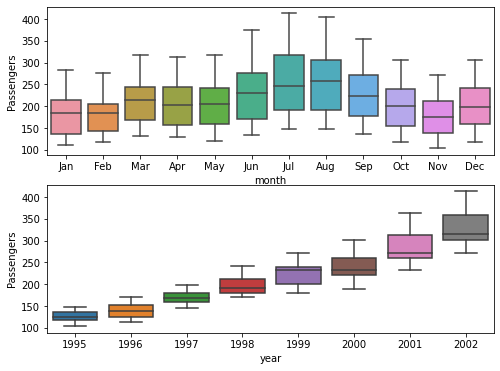

In [ ]:
plt.figure(figsize=(8,6))

plt.subplot(211)
sns.boxplot(x="month",y='Passengers',data = df)

plt.subplot(212)
sns.boxplot(x="year",y='Passengers',data = df)

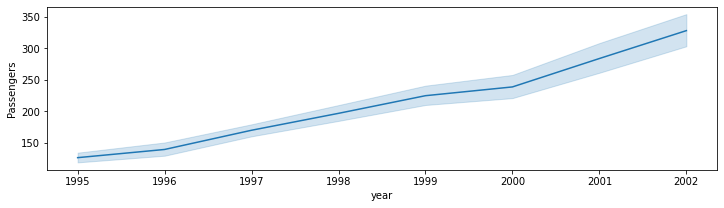

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x='year', y='Passengers', data = df)

# **Linear Model**

In [ ]:

import statsmodels.formula.api as smf

linear_model = smf.ols("Passengers~t",data = Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

57.000147882565884

# **Exponential**

In [ ]:
Exp = smf.ols("Passengers_log~t",data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.62154394719378

# **Quadratic**

In [ ]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

58.494274639475286

# **Compare the results**

In [ ]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_Exp,46.621544
0,rmse_linear,57.000148
2,rmse_Quad,58.494275


Here the smallest error is given by Exponential Model

# **Using ARIMA Model**

In [ ]:
data = pd.read_excel('/content/Airlines+Data.xlsx',
                    header = 0,
                    parse_dates = True)
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [ ]:
data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)
index=data.set_index(['Month'])
from datetime import datetime
index.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [ ]:
# separate out a valodation dataset
split_point = len(data) - 10

dataset, validation = data[0:split_point], data[split_point:]

print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 86, Validation 10


In [ ]:
dataset.to_csv('dataset.csv',header = False)
validation.to_csv('validation.csv' , header=False)

# **Persistence/Base Model**

In [ ]:
train = pd.read_csv('dataset.csv',
                   header=None,
                   index_col=0,
                   parse_dates=True,
                   squeeze=True)
train

0
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2001-10-01    274
2001-11-01    237
2001-12-01    278
2002-01-01    284
2002-02-01    277
Name: 1, Length: 86, dtype: int64

In [ ]:
X = train.values
X

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277])

In [ ]:
X = X.astype('float32')
X

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277.],
      dtype=float32)

In [ ]:
train_size = int(len(X) * 0.50)
train_size

43

In [ ]:
train,test = X[0:train_size], X[train_size:]

In [ ]:
train

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230.],
      dtype=float32)

In [ ]:
test

array([242., 209., 191., 172., 194., 196., 196., 236., 235., 229., 243.,
       264., 272., 237., 211., 180., 201., 204., 188., 235., 227., 234.,
       264., 302., 293., 259., 229., 203., 229., 242., 233., 267., 269.,
       270., 315., 364., 347., 312., 274., 237., 278., 284., 277.],
      dtype=float32)

# **Checking Stationarity of the data**

### **Ho : The data is not stationary**

### **H1 : The data is stationary**

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(data['Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                  1.340248
p-value                         0.996825
#lags used                     12.000000
number of observations used    83.000000
critical value (1%)            -3.511712
critical value (5%)            -2.897048
critical value (10%)           -2.585713
dtype: float64


#### Here the test statistics is greater than critical value so we reject null hypothesis and conclude that the data is stationary

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]             Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


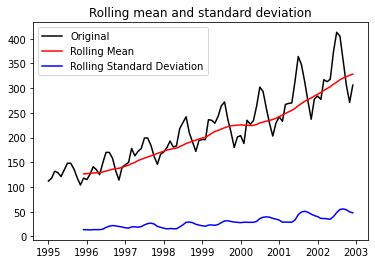

In [ ]:
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

# **Walk-forward validation**

In [ ]:
history = [x for x in train]
history

[112.0,
 118.0,
 132.0,
 129.0,
 121.0,
 135.0,
 148.0,
 148.0,
 136.0,
 119.0,
 104.0,
 118.0,
 115.0,
 126.0,
 141.0,
 135.0,
 125.0,
 149.0,
 170.0,
 170.0,
 158.0,
 133.0,
 114.0,
 140.0,
 145.0,
 150.0,
 178.0,
 163.0,
 172.0,
 178.0,
 199.0,
 199.0,
 184.0,
 162.0,
 146.0,
 166.0,
 171.0,
 180.0,
 193.0,
 181.0,
 183.0,
 218.0,
 230.0]

In [ ]:
predictions = list()

for i in range(len(test)):
    yhat = history[-1] # -1 is the last value
    predictions.append(yhat)
    
# observation
    obs = test[i]
    history.append(obs)
    
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>

In [ ]:
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 25.698


# **ARIMA Hyperparameters**

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
# make predictions
    predictions = list()
    for i in range(len(test)):
        model = ARIMA(history, order = arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[i])
        
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# **Grid search for p, d, q values**

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p,d,q in itertools.product(p_values, d_values, q_values):
    #for p in p_values:
        #for d in d_values:
            #for q in q_values:
                order = (p,d,q)
                try:
                  rmse = evaluate_arima_model(train, order)
                  if rmse < best_score:
                      best_score, best_cfg = rmse, order
                      print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
train = pd.read_csv('dataset.csv',
                    header = None,
                    index_col=0,
                    parse_dates=True,
                    squeeze=True)
train

0
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2001-10-01    274
2001-11-01    237
2001-12-01    278
2002-01-01    284
2002-02-01    277
Name: 1, Length: 86, dtype: int64

In [ ]:
# evaluate parameters
p_values = range(0,5)
d_values = range(0,5)
q_values = range(0,5)

In [ ]:
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=78.563
ARIMA(0, 0, 1) RMSE=44.789
ARIMA(0, 0, 2) RMSE=34.690
ARIMA(0, 0, 3) RMSE=28.832
ARIMA(0, 1, 0) RMSE=25.698
ARIMA(0, 1, 1) RMSE=25.127
ARIMA(0, 1, 4) RMSE=24.214
ARIMA(0, 2, 4) RMSE=24.184
ARIMA(2, 1, 1) RMSE=24.005
ARIMA(2, 1, 3) RMSE=22.842
ARIMA(3, 1, 3) RMSE=22.258


# **Build Model based on the optimized values**

In [ ]:
train = pd.read_csv('dataset.csv', header =0, index_col =0, parse_dates = True)
train

In [ ]:
# Prepare data
X = train.values
X = X.astype('float32')

In [ ]:
#fit model
model = ARIMA(X, order = (3,1,3))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 10)
forecast

In [ ]:
# fit model
from statsmodels.graphics.tsaplots import plot_predict

model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)
plot_predict(model_fit,1, 97)

In [ ]:
#Error on the test data
val=pd.read_csv('validation.csv',header =None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

# **Combine train and test data and build final model**

In [ ]:
data = pd.read_excel('/content/Airlines+Data.xlsx',
                    index_col = 0,
                    header = 0,
                    parse_dates = True)

In [ ]:
# prepare data
X = train.values
X = X.astype('float32')

In [ ]:
model = ARIMA(X, order = (3,1,3))
model_fit = model.fit()

In [ ]:
forecast = model_fit.forecast(steps = 10)
forecast

In [ ]:
plot_predict(model_fit,1, 97)